In [23]:
from sklearn.datasets import make_regression

In [24]:
X, y = make_regression(n_samples = 150, n_features = 1, random_state = 42, noise = 50)

In [25]:
X.shape

(150, 1)

In [26]:
y.shape

(150,)

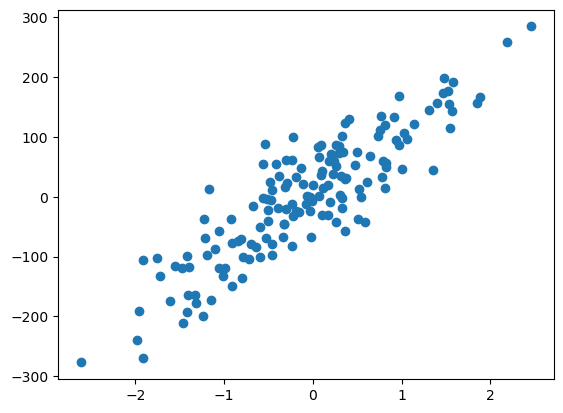

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
X.shape, X_train.shape, X_test.shape,

((150, 1), (120, 1), (30, 1))

$$
f(x) = h(x) \approx y
$$

In [ ]:
import numpy as np

class LinearReg:
    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y, debug = False):
        # M is the sample size
        # N is the feature size

        m, n =  X.shape

        self.weights = np.random.rand(n, 1) # n = rows, 1 = cols
        self.bias = np.random.rand(1) # Escalar value

        y = y.reshape(m, 1) # Vector columna en lugar de fila

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epochs):
            # Calculate prediction
            y_hat = np.dot(X, self.weights) + self.bias

            # Save current loss
            loss = np.mean((y_hat - y)**2)

            losses.append(loss)

            # Calculate gradient of MSE
            dw = (-2/m) * np.dot(X.T, (y - y_hat))
            db = (-2/m) * np.sum(y - y_hat)

            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            # Save the params
            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, weight: {self.weights}, bias: {self.bias}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [31]:
model = LinearReg()
model.fit(X_train, y_train)

epoch: 0, loss: 11315.627013005229, weight: [[1.93208091]], bias: [-0.00935608]
epoch: 1, loss: 10978.567220654782, weight: [[3.7413369]], bias: [-0.02748406]
epoch: 2, loss: 10654.339148446674, weight: [[5.51585503]], bias: [-0.04226869]
epoch: 3, loss: 10342.450743110141, weight: [[7.2563072]], bias: [-0.05383407]
epoch: 4, loss: 10042.42895949403, weight: [[8.96335223]], bias: [-0.0623007]
epoch: 5, loss: 9753.819020842502, weight: [[10.63763608]], bias: [-0.0677856]
epoch: 6, loss: 9476.183708068302, weight: [[12.27979216]], bias: [-0.07040237]
epoch: 7, loss: 9209.102676878781, weight: [[13.89044149]], bias: [-0.07026132]
epoch: 8, loss: 8952.17180165542, weight: [[15.47019305]], bias: [-0.06746951]
epoch: 9, loss: 8705.002545031184, weight: [[17.01964393]], bias: [-0.06213085]
epoch: 10, loss: 8467.221352152095, weight: [[18.5393796]], bias: [-0.05434621]
epoch: 11, loss: 8238.469068649612, weight: [[20.02997414]], bias: [-0.04421346]
epoch: 12, loss: 8018.40038138899, weight: [[

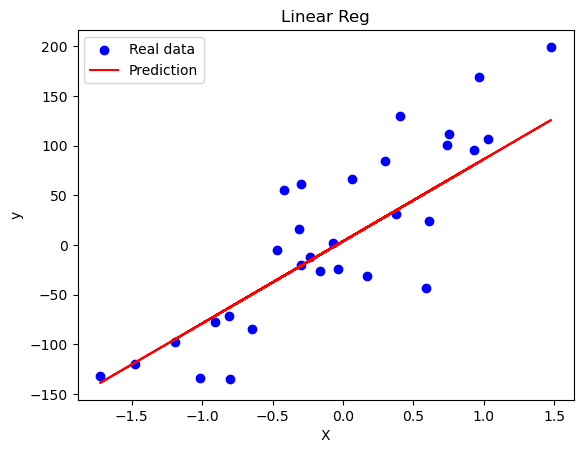

In [32]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Real data')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Reg')
plt.legend()
plt.show()

In [33]:
mse_test = np.mean((y_test.reshape(-1,1) - y_pred)**2)
print("MSE del test:", mse_test)

MSE del test: 2365.16526044946
